In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Carregar os dados

In [48]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [49]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [50]:
(df.describe().iloc[1].min()), (df.describe().iloc[1].max())

(0.005444468593783961, 283.28928493805694)

Detalhes:

Algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores.

Podemos observar que temos um range de valores desproporcional através das colunas. A menor média de uma coluna é 0.005 enquanto que a maior é 283. Isso pode fazer com que a influência de determinada coluna seja muito maior que outras.

### Separar características e alvo

In [51]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Normalização

In [7]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)

### Divisão em Treinamento, Validação e Teste

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

### Encontrando a Melhor Configuração de Hiperparâmetros

In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_clf = DecisionTreeClassifier(random_state=42)

In [54]:
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

In [55]:
print("\nIniciando a busca pelos melhores hiperparâmetros...")
grid_search.fit(X_train, y_train)


Iniciando a busca pelos melhores hiperparâmetros...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [56]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nMelhores hiperparâmetros encontrados: {best_params}")
print(f"Melhor score de F1 no cross-validation: {best_score:.4f}")


Melhores hiperparâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score de F1 no cross-validation: 0.8947


In [57]:
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [58]:
y_val_pred = best_dt_clf.predict(X_val)
val_f1 = f1_score(y_val, y_val_pred)
print(f"F1 score no conjunto de validação: {val_f1:.4f}")

F1 score no conjunto de validação: 0.8753


In [59]:
# Definir os tamanhos de treinamento (5% a 95% com passo de 5%)
train_sizes = np.arange(0.05, 1.00, 0.05)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for size in train_sizes:
    # Determinar o número de amostras para o tamanho atual
    n_samples = int(size * X_train.shape[0])

    if n_samples < 1:
        n_samples = 1  # Garantir pelo menos uma amostra

    # Realizar amostragem estratificada
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train, y_train,
        train_size=n_samples,
        stratify=y_train,
        random_state=42
    )

    clf = DecisionTreeClassifier(**best_params, random_state=42)
    clf.fit(X_train_subset, y_train_subset)

    y_val_pred = clf.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Tamanho de treinamento: {size*100:.0f}% - Acurácia: {acc:.4f}, Precisão: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

Tamanho de treinamento: 5% - Acurácia: 0.8043, Precisão: 0.7857, Recall: 0.6929, F1 Score: 0.7364
Tamanho de treinamento: 10% - Acurácia: 0.8178, Precisão: 0.7662, Recall: 0.7743, F1 Score: 0.7702
Tamanho de treinamento: 15% - Acurácia: 0.8758, Precisão: 0.8783, Recall: 0.7953, F1 Score: 0.8347
Tamanho de treinamento: 20% - Acurácia: 0.8696, Precisão: 0.8437, Recall: 0.8215, F1 Score: 0.8324
Tamanho de treinamento: 25% - Acurácia: 0.8861, Precisão: 0.8796, Recall: 0.8241, F1 Score: 0.8509
Tamanho de treinamento: 30% - Acurácia: 0.8737, Precisão: 0.8509, Recall: 0.8241, F1 Score: 0.8373
Tamanho de treinamento: 35% - Acurácia: 0.8861, Precisão: 0.8556, Recall: 0.8556, F1 Score: 0.8556
Tamanho de treinamento: 40% - Acurácia: 0.8861, Precisão: 0.8652, Recall: 0.8425, F1 Score: 0.8537
Tamanho de treinamento: 45% - Acurácia: 0.8872, Precisão: 0.8757, Recall: 0.8320, F1 Score: 0.8533
Tamanho de treinamento: 50% - Acurácia: 0.8903, Precisão: 0.9032, Recall: 0.8084, F1 Score: 0.8532
Tamanho de 

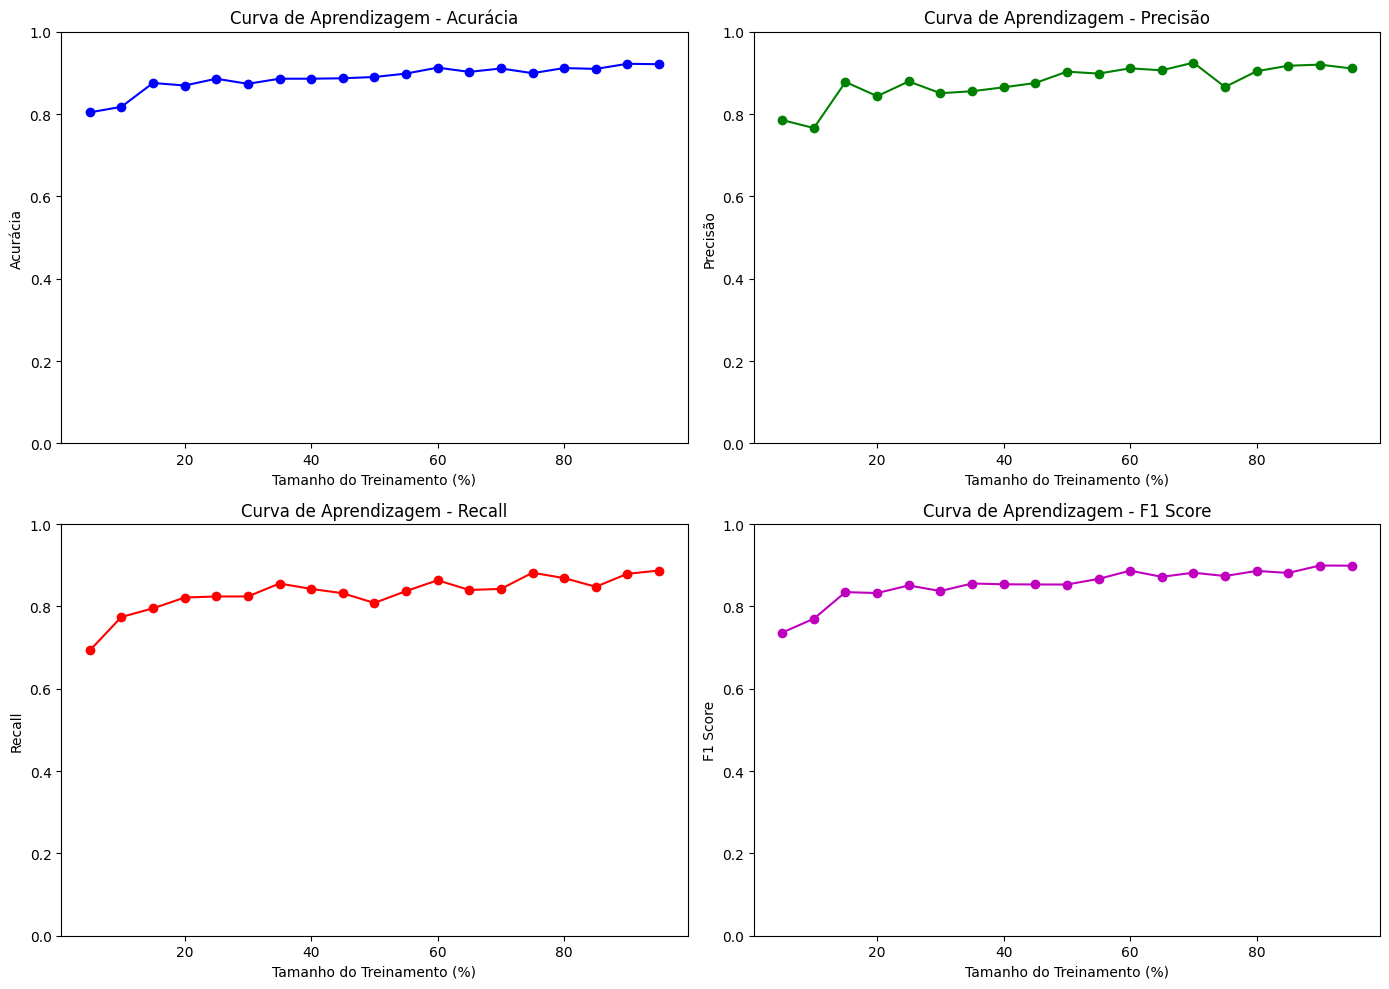

In [60]:
# Converter os tamanhos para porcentagem
train_sizes_percent = train_sizes * 100

plt.figure(figsize=(14, 10))

# Plotar Acurácia
plt.subplot(2, 2, 1)
plt.plot(train_sizes_percent, accuracy_scores, marker='o', color='b')
plt.title('Curva de Aprendizagem - Acurácia')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

# Plotar Precisão
plt.subplot(2, 2, 2)
plt.plot(train_sizes_percent, precision_scores, marker='o', color='g')
plt.title('Curva de Aprendizagem - Precisão')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Precisão')
plt.ylim(0, 1)

# Plotar Recall
plt.subplot(2, 2, 3)
plt.plot(train_sizes_percent, recall_scores, marker='o', color='r')
plt.title('Curva de Aprendizagem - Recall')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Recall')
plt.ylim(0, 1)

# Plotar F1 Score
plt.subplot(2, 2, 4)
plt.plot(train_sizes_percent, f1_scores, marker='o', color='m')
plt.title('Curva de Aprendizagem - F1 Score')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Avaliação Final no Conjunto de Teste

In [61]:
y_test_pred = best_dt_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nAvaliação final no conjunto de teste:")
print(f"Acurácia: {test_accuracy:.4f}")
print(f"Precisão: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Avaliação final no conjunto de teste:
Acurácia: 0.9218
Precisão: 0.9241
Recall: 0.8732
F1 Score: 0.8979
